In [1]:
#read images, convert to numpy, manipulate
from PIL import Image
import numpy as np
import glob
#identify edges, discriptive vectors etc
from facenet_models import FacenetModel
#other imports
from vision_profile import FaceDatabase
from descriptor import descriptorMatch, findThreshold, displayFinalPicture

%matplotlib inline

In [2]:
model = FacenetModel()

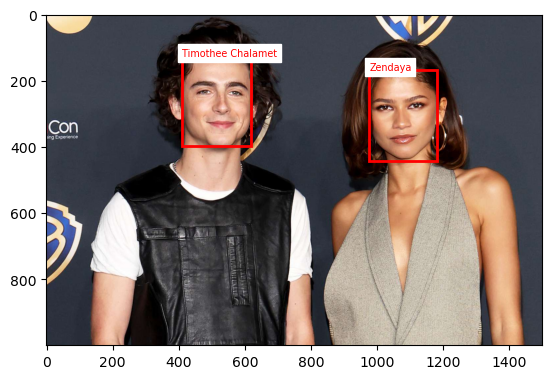

In [3]:
pic = Image.open(r'./pics/test/group_pic.jpg')  
pic_arr = np.array(pic)
boxes, probabilities, landmarks = model.detect(pic_arr)
descriptors = model.compute_descriptors(pic_arr, boxes)
#database = FaceDatabase()
db = FaceDatabase(file_path="database.pkl")
db.load('database.pkl')
#print(f"Number of faces detected: {len(boxes)}")
verdict = []
for i in range(len(descriptors)):
    verdict.append(descriptorMatch(db, descriptors[i].reshape(1, 512)))
displayFinalPicture(pic_arr, verdict)

In [ ]:
#CODE TO FIND THRESHOLD FOR WHAT COUNTS AS A PERSON AND WHAT DOES NOT
#THRESHOLD EXTIMATE = 0.99 (eyeball-ed it)
for filename in glob.glob(r'./pics/train/*.jpg'):
    pic = Image.open(filename)
    pic_arr = np.array(pic)
    boxes, probabilities, landmarks = model.detect(pic_arr)
    print(filename[13:-6])
    print(f"Number of faces detected: {len(boxes)}")
    print(probabilities)

In [ ]:
# CODE TO FIND COS_DISTANCE THRESHOLD!!!
# THRESHOLD APPROXIMATED = 0.475 (actual function + some more calculations)
for filename in glob.glob(r'./pics/test/*.jpg'): 
    pic = Image.open(filename) 
    pic_arr = np.array(pic)
    boxes, probabilities, landmarks = model.detect(pic_arr)
    descriptors = model.compute_descriptors(pic_arr, boxes)
    #database = FaceDatabase()
    db = FaceDatabase(file_path="database.pkl")
    db.load('database.pkl')
    verdict = []
    for i in range(len(descriptors)):
        verdict.append(descriptorMatch(db, descriptors[i].reshape(1, 512), threshold=0.5))
    print(verdict)
print(findThreshold())